In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
#converting from xlsx to csv format
data_xls = pd.read_excel('cars.xlsx', 'Sheet4', index_col=None)
data_xls.to_csv('cars.csv', encoding='utf-8', index=False)




In [3]:
#loading data
cars = pd.read_csv("cars.csv")

cars.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 16 columns):
MMV              3879 non-null object
Make             3879 non-null object
Model            3879 non-null object
Variant          3879 non-null object
Type             3879 non-null object
Fuel Type        3879 non-null object
Age              3879 non-null int64
Transmission     3879 non-null object
Color            3879 non-null object
Kms              3879 non-null int64
No of Owner      3879 non-null int64
Heath score      3879 non-null float64
price score      3879 non-null float64
on road price    3879 non-null float64
Current Price    3879 non-null float64
Dep              3879 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 485.0+ KB


In [4]:
#splitting data
y=cars.Dep
x=cars.drop('Dep',axis=1)
train, test = train_test_split(cars, test_size=0.5)








train.head()
train.info()
test.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 532 to 2755
Data columns (total 16 columns):
MMV              1939 non-null object
Make             1939 non-null object
Model            1939 non-null object
Variant          1939 non-null object
Type             1939 non-null object
Fuel Type        1939 non-null object
Age              1939 non-null int64
Transmission     1939 non-null object
Color            1939 non-null object
Kms              1939 non-null int64
No of Owner      1939 non-null int64
Heath score      1939 non-null float64
price score      1939 non-null float64
on road price    1939 non-null float64
Current Price    1939 non-null float64
Dep              1939 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 257.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 2110 to 3311
Data columns (total 16 columns):
MMV              1940 non-null object
Make             1940 non-null object
Model            1940 non-null 

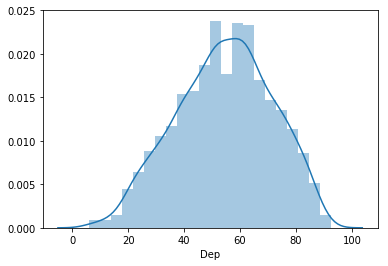

In [5]:
#check missing values
train.columns[train.isnull().any()]
test.columns[test.isnull().any()]



sns.distplot(train['Dep'])

In [6]:
#skewness
print("The skewness of SalePrice is {}".format(train['Dep'].skew()))





The skewness of SalePrice is -0.1873580059490463


In [7]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))



There are 8 numeric and 8 categorical columns in train data


In [8]:
#delete variables which are not given in question
del numeric_data['Heath score']
del numeric_data['price score']
del numeric_data['Current Price']
del cat_data['MMV']
del numeric_data['Age']



cat_data.shape





(1939, 7)

In [9]:
numeric_data.shape



(1939, 4)

In [10]:
cat_data.describe()

,Make,Model,Variant,Type,Fuel Type,Transmission,Color
count,1939,1939,1939,1939,1939,1939,1939
unique,4,61,368,6,7,3,34
top,Maruti Suzuki,Swift,VXi,Hatchback,Petrol,Manual,White
freq,744,182,119,908,1390,1636,544


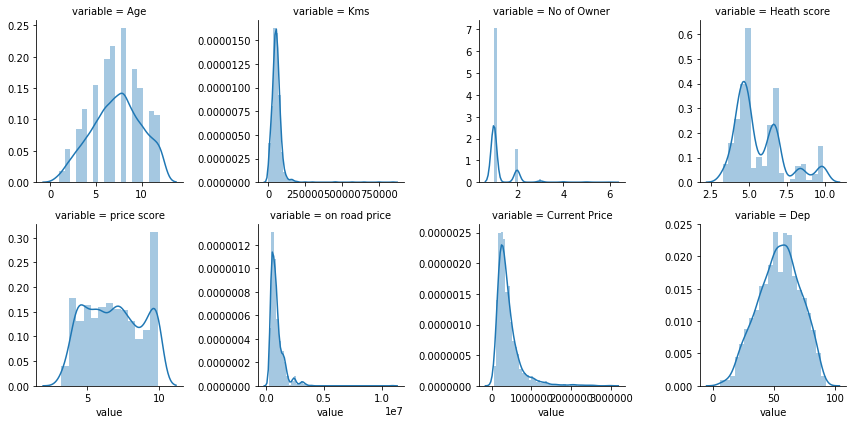

In [11]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

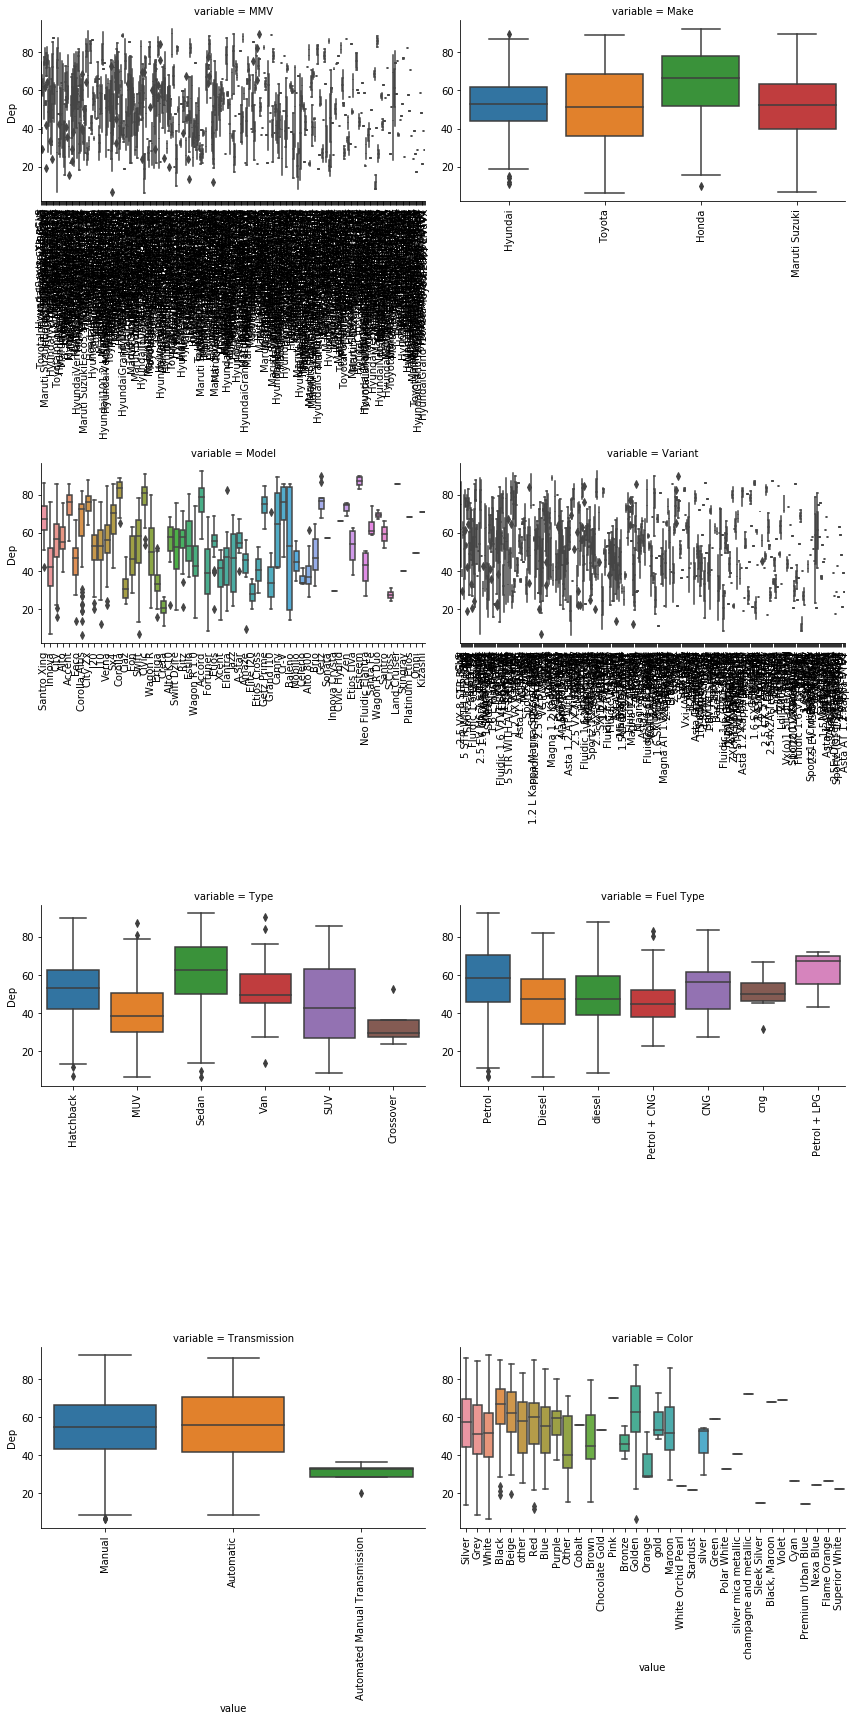

In [12]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='Dep', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(boxplot, 'value','Dep')
g

In [13]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 532 to 2755
Data columns (total 4 columns):
Kms              1939 non-null int64
No of Owner      1939 non-null int64
on road price    1939 non-null float64
Dep              1939 non-null float64
dtypes: float64(2), int64(2)
memory usage: 75.7 KB


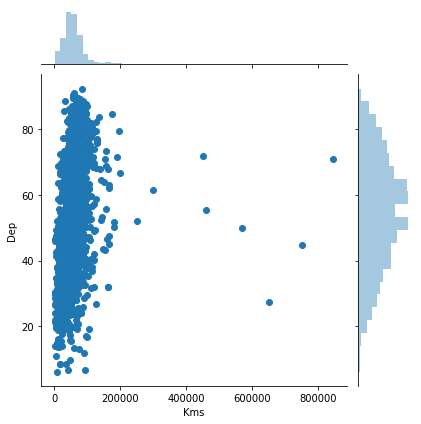

In [14]:
sns.jointplot(x=train['Kms'], y=train['Dep'])

In [15]:
#removing outliers
train.drop(train[train['Kms'] > 400000].index, inplace=True)
train.shape 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1933, 16)

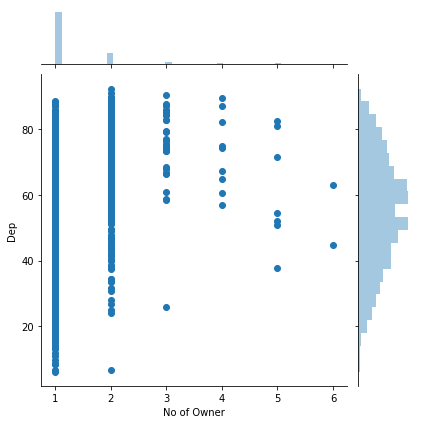

In [16]:
sns.jointplot(x=train['No of Owner'], y=train['Dep'])

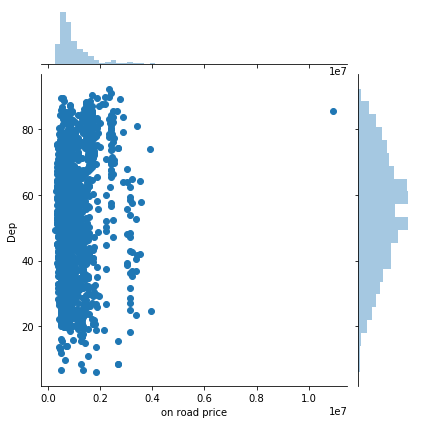

In [17]:
sns.jointplot(x=train['on road price'], y=train['Dep'])

In [18]:
#removing outliers
train.drop(train[train['on road price'] > 10000000].index, inplace=True)
train.shape 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1932, 16)

In [19]:
numeric_data.describe()

,Kms,No of Owner,on road price,Dep
count,1939.000000,1939.000000,1.939000e+03,1939.000000
mean,56349.374936,1.239299,9.407697e+05,54.450013
std,42500.718164,0.555935,6.032744e+05,17.087834
min,863.000000,1.000000,2.515408e+05,6.184015
25%,38000.000000,1.000000,5.378497e+05,42.394309
50%,52500.000000,1.000000,7.774058e+05,55.076763
75%,68998.500000,1.000000,1.127358e+06,66.988315
max,846004.000000,6.000000,1.095466e+07,92.453905


In [20]:
cat_data.describe()

,Make,Model,Variant,Type,Fuel Type,Transmission,Color
count,1939,1939,1939,1939,1939,1939,1939
unique,4,61,368,6,7,3,34
top,Maruti Suzuki,Swift,VXi,Hatchback,Petrol,Manual,White
freq,744,182,119,908,1390,1636,544


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [22]:
# Label encoder
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [23]:
columns=['Make','Model','Variant','Type', 'Fuel Type','Transmission','Color']
le = MultiColumnLabelEncoder()
MultiColumnLabelEncoder(columns = ['Make','Model','Variant','Type', 'Fuel Type','Transmission','Color']).fit_transform(train)
MultiColumnLabelEncoder(columns = ['Make','Model','Variant','Type', 'Fuel Type','Transmission','Color']).fit_transform(test)





,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
2110,Maruti SuzukiWagon R 1.0LXi CNG (O),2,54,211,1,4,4,2,16,90000,1,4.1,7.0,5.544230e+05,2.755616e+05,50.297589
2744,Maruti SuzukiSwiftZXi,2,46,349,1,3,7,1,14,28913,1,6.8,4.8,5.981338e+05,3.475680e+05,41.891263
735,HyundaiI10Asta1.2,1,33,142,1,3,10,2,14,51000,2,8.1,9.9,5.891565e+05,1.980000e+05,66.392629
1311,HondaAccord2.4 AT,0,3,76,4,3,11,1,20,78000,1,5.0,9.4,2.426682e+06,2.290080e+05,90.562917
2175,ToyotaEtiosV,3,26,282,4,7,8,2,2,65000,2,6.4,3.4,7.819281e+05,5.161920e+05,33.984721
1960,ToyotaCorolla Altis1.8 J,3,17,49,4,3,8,2,16,67600,1,6.3,9.9,1.352344e+06,4.265500e+05,68.458469
2332,Maruti SuzukiSwift DzireLXi,2,48,205,4,3,8,2,20,139000,1,5.0,7.2,6.413150e+05,2.335180e+05,63.587629
3078,Maruti SuzukiAltoLXi BS-III,2,4,208,1,3,10,2,14,47000,1,4.5,8.2,3.420903e+05,1.012000e+05,70.417165
1966,ToyotaInnova2.5 G 7 STR BS-IV,3,36,89,2,1,6,2,16,92000,1,4.6,9.1,1.475247e+06,8.790880e+05,40.410792
922,HyundaiVernaFluidic 1.6 CRDi EX,1,50,169,4,1,6,2,16,93000,1,9.3,8.9,1.166355e+06,4.972000e+05,57.371472


In [24]:



def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "Make", None)
       onehot_df = onehot(onehot_df, df, "Model", None)
       onehot_df = onehot(onehot_df, df, "Variant", None)
       onehot_df = onehot(onehot_df, df, "Type", None)
       onehot_df = onehot(onehot_df, df, "Fuel Type", None)
       onehot_df = onehot(onehot_df, df, "Transmission", None)
       onehot_df = onehot(onehot_df, df, "Color", None)
       return onehot_df


      


In [25]:
train.shape

(1932, 16)

In [26]:
#one hot encoding for test dataset.
onehot_df = munge_onehot(train)
train_new = train.join(onehot_df) 
train_new.shape

(1932, 496)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 532 to 2755
Data columns (total 16 columns):
MMV              1932 non-null object
Make             1932 non-null object
Model            1932 non-null object
Variant          1932 non-null object
Type             1932 non-null object
Fuel Type        1932 non-null object
Age              1932 non-null int64
Transmission     1932 non-null object
Color            1932 non-null object
Kms              1932 non-null int64
No of Owner      1932 non-null int64
Heath score      1932 non-null float64
price score      1932 non-null float64
on road price    1932 non-null float64
Current Price    1932 non-null float64
Dep              1932 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 336.6+ KB


In [28]:
#one hot encoding for test dataset.
onehot_df = munge_onehot(test)
test_new = test.join(onehot_df) 
test_new.shape

(1940, 485)

In [29]:
train.describe()


,Age,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
count,1932.000000,1932.000000,1932.00000,1932.000000,1932.000000,1.932000e+03,1.932000e+03,1932.000000
mean,7.288820,54583.557971,1.23913,5.704089,6.873861,9.354672e+05,4.159050e+05,54.436971
std,2.692302,27451.656833,0.55627,1.618587,1.941915,5.593511e+05,3.138877e+05,17.082529
min,1.000000,863.000000,1.00000,3.300000,3.200000,2.515408e+05,5.192000e+04,6.184015
25%,5.000000,38000.000000,1.00000,4.500000,5.200000,5.378497e+05,2.290080e+05,42.327503
50%,7.000000,52204.000000,1.00000,5.000000,6.800000,7.762959e+05,3.314050e+05,55.029702
75%,9.000000,68413.500000,1.00000,6.800000,8.600000,1.124364e+06,4.934095e+05,66.902487
max,12.000000,300000.000000,6.00000,9.900000,9.900000,3.946759e+06,2.974683e+06,92.453905


In [30]:
test.describe()

,Age,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
count,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1.940000e+03,1.940000e+03,1940.000000
mean,7.258247,57275.561340,1.213918,5.692526,6.826959,9.355165e+05,4.095912e+05,54.235215
std,2.699456,49561.174196,0.542293,1.621453,1.910210,5.645256e+05,2.913393e+05,17.385285
min,1.000000,1000.000000,1.000000,3.300000,3.200000,2.372747e+05,6.600000e+04,2.071667
25%,5.000000,38000.000000,1.000000,4.500000,5.200000,5.406397e+05,2.380320e+05,41.968622
50%,7.000000,53294.500000,1.000000,5.000000,6.800000,7.900747e+05,3.247876e+05,55.383740
75%,9.000000,68106.000000,1.000000,6.800000,8.300000,1.104131e+06,4.829980e+05,67.465525
max,12.000000,854995.000000,6.000000,9.900000,9.900000,3.908606e+06,2.945000e+06,90.889008


In [31]:
# Get missing columns in the training test
missing_cols = set( train_new.columns ) - set( test_new.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_new[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_new = test_new[train_new.columns]

In [32]:
#create a label set
label_df = pd.DataFrame(index = train_new.index, columns = ['Dep'])
print("Training set size:", train_new.shape)
print("Test set size:", test_new.shape)



Training set size: (1932, 496)
Test set size: (1940, 496)


In [33]:
y_train=train_new['Dep']

In [34]:
del train_new["Dep"]

columns=['Make','Model','Variant','Type', 'Fuel Type','Transmission','Color','MMV']


for i in columns:
    del train_new[i]
    del test_new[i]



In [35]:
train_new.head()

,Age,Kms,No of Owner,Heath score,price score,on road price,Current Price,_Make_Honda,_Make_Hyundai,_Make_Maruti Suzuki,...,_Color_Stardust,_Color_Superior White,_Color_Violet,_Color_White,_Color_White Orchid Pearl,_Color_champagne and metallic,_Color_gold,_Color_other,_Color_silver,_Color_silver mica metallic
532,9,46000,1,4.5,7.9,4.571741e+05,154000.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
270,6,65000,1,3.8,8.2,1.713152e+06,1013725.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1610,9,70000,2,6.4,8.0,1.041562e+06,403200.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3551,11,105230,2,6.3,5.6,3.363312e+05,127600.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
562,8,33000,1,6.8,8.2,6.911106e+05,184800.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#model training


from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train_new, y_train)

from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))




In [37]:
y_test=test_new['Dep']

In [38]:
del test_new['Dep']

In [39]:

# prediction on the test set
y_pred_lasso = regr.predict(test_new)



In [40]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [41]:
 from sklearn.linear_model import LinearRegression

In [42]:
#Linear Regression Model
reg = LinearRegression().fit(train_new, y_train)
reg.score(train_new, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.9516729580262084

In [43]:
pre=reg.predict(test_new)


In [44]:
from sklearn.metrics import r2_score

In [45]:
#Result from Regression Model
r2_score(y_test, pre)  




0.8702523931641344

In [46]:
#Result from Lasso Model
r2_score(y_test, y_pred_lasso)  



0.9048318753145728